<a href="https://colab.research.google.com/github/tambonbon/A-guide-to-Machine-Learning-in-R/blob/master/HR_Analytics_Job_Change_of_Data_Scientists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics: Job Change of Data Scientists
> **Author:** [Anh Tran](https://www.anhtran.nl/)

<img src="https://drive.google.com/uc?id=1HTA1y9JFZynhywHUAhY9QXyDpylsDbzg"/>

In this notebook, we will tackle the [HR Analytics dataset](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=sample_submission.csv), develop some end-to-end Machine Learning pipelines, and visualize our model results on a web app powered by [Streamlit](https://www.streamlit.io/).

## About the dataset
A company is interested in understanding the factors that may influence a data scientist's decision to stay with a company or switch jobs. This allows the company to "reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates."

### Task
Our task is to

1.   predict the probability of a candidate looking for a new job versus working for the company (i.e., a regression problem), and
2.   interpret factors affected by their decision.

In this notebook, for task 1, instead of predicting a probability, we will formulate our problem as a **classification** problem, and predicting whether an employee will stay or switch job.

### What's included?
Features:
*   enrollee_id : Unique ID for candidate
*   city: City code
*   city_ development _index : Developement index of the city (scaled)
*   gender: Gender of candidate
*   relevent_experience: Relevant experience of candidate
*   enrolled_university: Type of University course enrolled if any
*   education_level: Education level of candidate
*   major_discipline :Education major discipline of candidate
*   experience: Candidate total experience in years
*   company_size: No of employees in current employer's company
*   company_type : Type of current employer
*   lastnewjob: Difference in years between previous job and current job
*   training_hours: training hours completed

Target:
*   0 – Not looking for job change
*   1 – Looking for a job change

### Challenges
So far, the following challenges regarding the dataset are known to us:

*   The dataset is **imbalanced**.
*   The dataset contains many **categorical features**, so one-hot encoding might be needed.
*   The dataset contains **missing data**, so data imputation might be needed.

## About Streamlit
Streamlit is an open-source app framework for Machine Learning and Data Science teams. Create beautiful data apps in hours, not weeks. All in pure Python. For examples of beautiful web apps powered by Streamlit, check out the gallery [here](https://www.streamlit.io/gallery).



## End-to-end Data Science workflow

### 1. Download data from Kaggle
First, we download the dataset consisting of 3 CSVs from Kaggle: train set, test set, and sample submission.

1.   Go to your Kaggle account, and scroll to the API section.
2.   Click on "Expire API Token" to expire all existing API tokens.
3.   Click on "Create New API Token". A new API token (`kaggle.json`) will be automatically downloaded.
4.   Go to your Google Colab project file (i.e., this notebook) and run the following commands:
```
!pip install -q kaggle
from google.colab import files
files.upload()
```
   *Note: This kaggle version is apparently outdated. You can update it by running the following command:*
   ```
   !pip install --upgrade --force-reinstall --no-deps kaggle
   ```
5.   Upload `kaggle.json`. Then run the following commands:
```
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
```
   These commands will make directory named "kaggle" and copy `kaggle.json` there.
6.   Change the permissions of the file:
```
!chmod 600 ~/.kaggle/kaggle.json
```
7.   You can check if everything works by running this command:
```
!kaggle datasets list
```
8.   To download this dataset, on the [dataset](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists) page, click on the three dots, copy the API command, and then run it here:
```
!kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists
```
   This will download a `.zip` file containing all 3 CSVs.
9.   Make a new directory called "data":
```
!mkdir data
```
10.   Migrate the downloaded file to this new directory, and unzip it:
```
!unzip hr-analytics-job-change-of-data-scientists.zip -d data
```

And that's all! You have successfully downloaded the dataset from Kaggle!

In [ ]:
!pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=3c5d234813b6cc9d3633fbc6a87f2a095280c5d76ce752465b9a50571f640048
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arashnic/hr-analytics-job-change-of-data-scientists            HR Analytics: Job Change of Data Scientists        295KB  2020-12-07 00:25:10           2016        219  1.0              
utkarshxy/who-worldhealth-statistics-2020-complete             World Health 2020 🌏 | For Geospatial Analysis        1MB  2021-01-01 15:16:17             73         19  1.0              
babyoda/access-to-computers-from-home-oecd                     Access to Computers From Home OECD                   3KB  2020-12-04 10:50:09            190         56  1.0              
shashwatwork/impact-of-covid19-pandemic-on-the-global-economy  Impact 

In [ ]:
!kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists

  0% 0.00/295k [00:00<?, ?B/s]
100% 295k/295k [00:00<00:00, 80.7MB/s]


In [ ]:
!mkdir data
!unzip hr-analytics-job-change-of-data-scientists.zip -d data

Archive:  hr-analytics-job-change-of-data-scientists.zip
  inflating: data/aug_test.csv       
  inflating: data/aug_train.csv      
  inflating: data/sample_submission.csv  


### 2. Explore the data

As with any other data science project, we first explore the data to understand better what it contains, the distributions of the different variables in the data, and what challenges it might bring

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the train and test sets
train = pd.read_csv(r'/content/data/aug_train.csv')
test = pd.read_csv(r'/content/data/aug_test.csv')
# Display top 5 rows
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
 # Check the number of samples in each set
print('Train set:')
print('Number of rows:', len(train))
print('Number of columns:', train.shape[1])
print('')
print('Test set:')
print('Number of rows:', len(test))
print('Number of columns:', test.shape[1])

Train set:
Number of rows: 19158
Number of columns: 14

Test set:
Number of rows: 2129
Number of columns: 13


In [ ]:
test.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

We have 12 features, of which only 2 are numerical features (`city_development_index` and `training hours`) and 10 are categorical features. We can assume that a higher city development index (CDI) implies a more developed city, and vice versa. The ID column (`enrollee_id`) serves as a unique identifier for each employee, and therefore should not affect our target.

In [ ]:
# Describe the numerical variables in the train set
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [ ]:
# Describe the numerical variables in the test set
test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


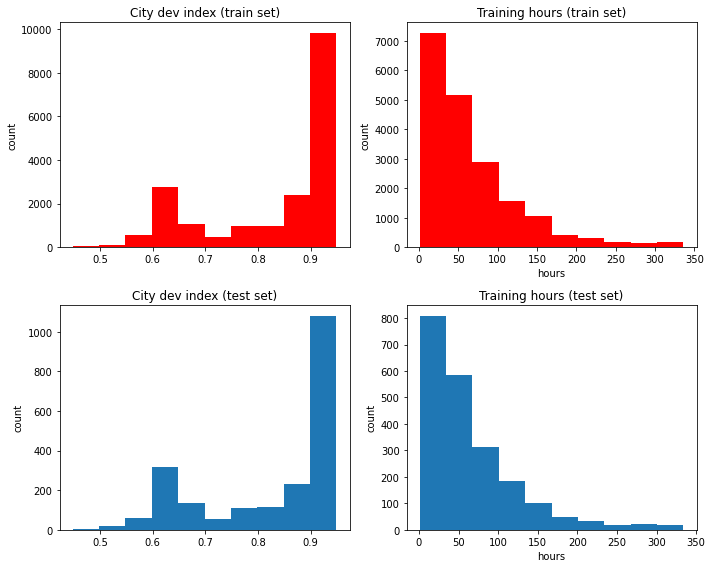

In [ ]:
# Plot the distributions of city_development_index and training_hours
fig, ax = plt.subplots(2,2, figsize = (10,8))
ax[0,0].hist(train.city_development_index, color = 'r')
ax[0,1].hist(train.training_hours, color = 'r')
ax[1,0].hist(test.city_development_index)
ax[1,1].hist(test.training_hours)
ax[0,0].set_title('City dev index (train set)')
ax[0,1].set_title('Training hours (train set)')
ax[1,0].set_title('City dev index (test set)')
ax[1,1].set_title('Training hours (test set)')
for axis in ax.flat:
    axis.set(ylabel='count')
ax[0,1].set(xlabel='hours')
ax[1,1].set(xlabel='hours')
plt.tight_layout()

The 2 numerical features seem to follow the same distributions in both our train and test sets, as seen from the similar graphs above.

Now, let's check how many uniquq categories are present in each of the categorical feature.

In [ ]:
train_categorical = train.drop(['enrollee_id','city_development_index','training_hours'],axis=1)
train_categorical.nunique().sort_values(ascending = False)

city                   123
experience              22
company_size             8
last_new_job             6
company_type             6
major_discipline         6
education_level          5
enrolled_university      3
gender                   3
target                   2
relevent_experience      2
dtype: int64

There are a lot of cities and experience levels here, suggesting a wide variety of candidates.

Let's examine some of these categorical features further:

In [ ]:
for c in train_categorical.columns:
    print ("---- %s ---" % c)
    print (train_categorical[c].value_counts(dropna = False))
    print('')

---- city ---
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

---- gender ---
Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

---- relevent_experience ---
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

---- enrolled_university ---
no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

---- education_level ---
Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

---- major_discipline ---
STEM               14492
NaN                 2813
Humanities           669
Other                381
Business D

There are missing values in the following categorical features in the train set:

*   `gender`
*   `enrolled_university`
*   `education_level`
*   `major_discipline`
*   `experience`
*   `company_size`
*   `company_type`
*   `last_new_job`




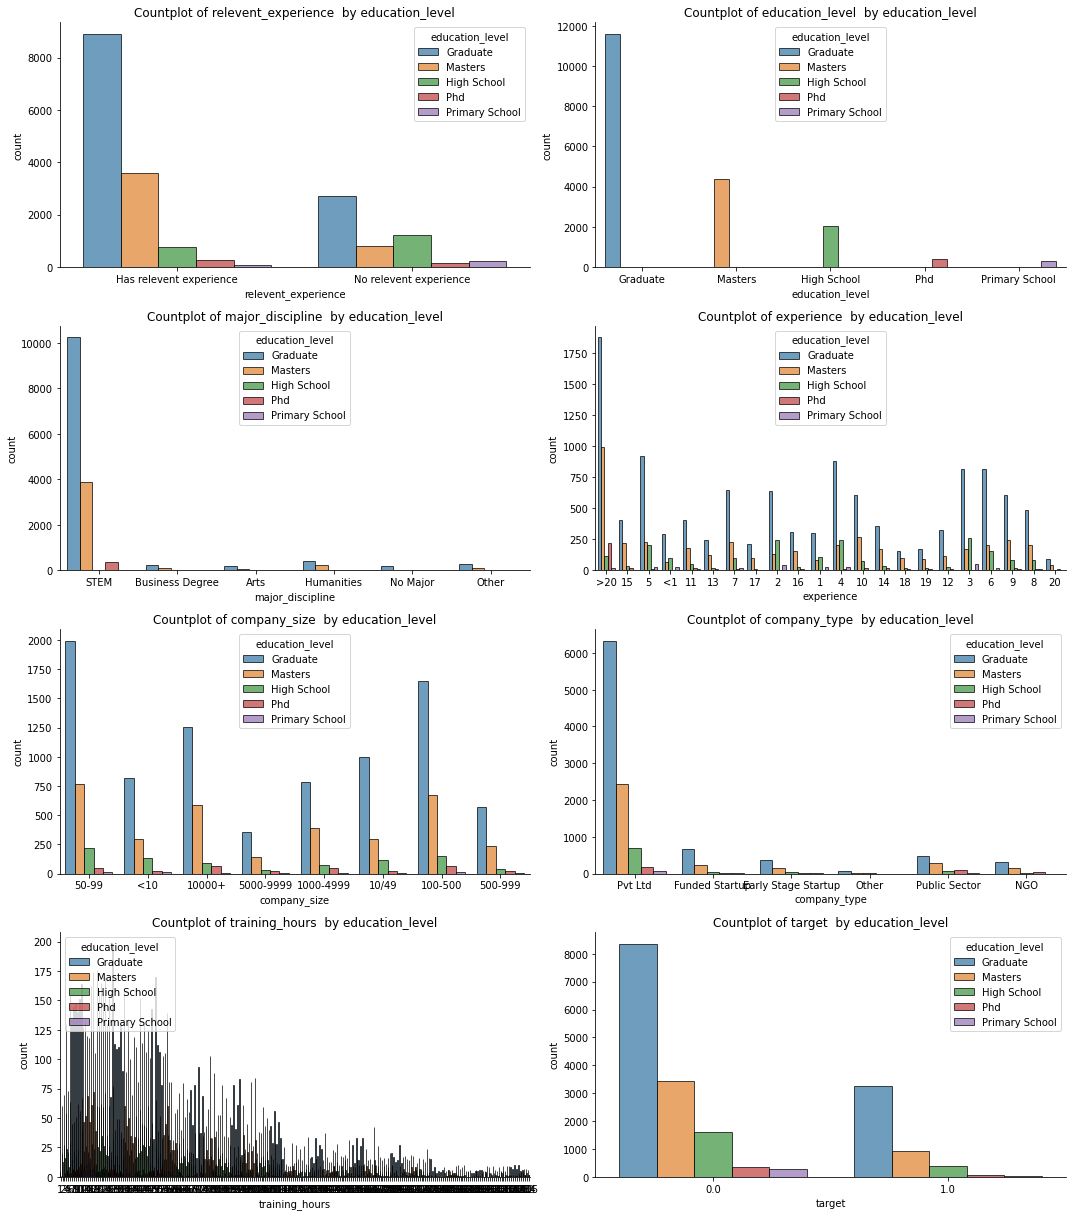

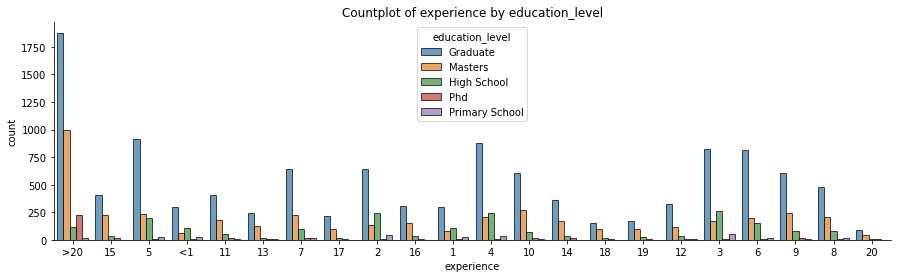

In [ ]:
# barplots showing the frequency of each category separated by label
import seaborn as sns

plt.figure(figsize=[15,17])
fft=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type", "training_hours","target"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=train)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()
    
plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='education_level',edgecolor="black", alpha=0.7, data=train)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

We check how many missing values are present in total in the dataset.

In [ ]:
pd.DataFrame(
    len(train) - train.count(),
    columns = ['number of missing values']
).sort_values('number of missing values')

,number of missing values
enrollee_id,0
city,0
city_development_index,0
relevent_experience,0
training_hours,0
target,0
experience,65
enrolled_university,386
last_new_job,423
education_level,460


In [ ]:
pd.DataFrame(
    len(test) - test.count(),
    columns = ['number of missing values']
).sort_values('number of missing values')

,number of missing values
enrollee_id,0
city,0
city_development_index,0
relevent_experience,0
training_hours,0
experience,5
enrolled_university,31
last_new_job,40
education_level,52
major_discipline,312


In both the train and test sets, the top 4 features that have most missing values are:

*   company_type
*   company_size
*   gender
*   major_discipline

Lastly, we examine the apparent imbalanced nature of our dataset:

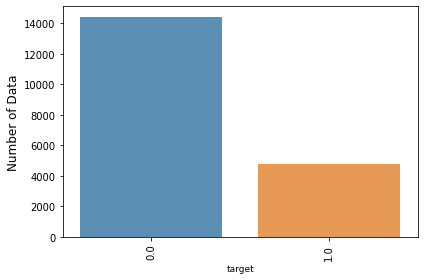

In [ ]:
mnj = train['target'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(mnj.index, mnj.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

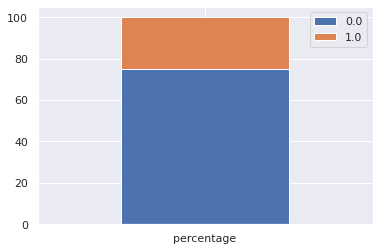

In [ ]:
target_dist = pd.DataFrame(mnj).reset_index().rename(columns = {'index':'value','target':'count'})
target_dist['percentage'] = target_dist['count'].apply(lambda x: round(x*100/target_dist['count'].sum(),1))
sns.set()
fig, ax = plt.subplots()
target_dist.drop(['count'], axis = 1).set_index('value').T.plot(kind='bar', stacked=True, ax = ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
plt.legend()

As you can see, here we have imbalanced data: the proportion of `1`'s ( Looking for a job change) is way loweer than that of `0`'s (Not looking for job change). For most Machine Learning models, we have to first address this issue before running them.

### 3. Preprocessing

We preprocess the data as follows:

*   Dealing with categorical features: one-hot encoding
*   Dealing with missing categorical data: through one-hot encoding, we account for the scenario whereby the data is missing. In this way, we make sure that there's is no data leakage through imputation, and also do not incur data loss through removing samples with missing values.
*   Dealing with imbalanced data:
   - **Oversampling** the minority class
   - **Undersampling** the majority class
   - **Synthetically sampling** the minority class using [Synthetic Minority Oversampling Technique (SMOTE)](https://arxiv.org/pdf/1106.1813)
*   Normalize `training_hours` between `0` and `1`.
*   Dealing with multicollinearity: Principal Component Analysis to reduce dimensionality of our one-hot encoded dataset.



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OneHotEncoder(handle_unknown='ignore')
X_train = train.drop(['enrollee_id','target'], axis = 1)
X_train_categorical = X_train.drop(['city_development_index','training_hours'],axis=1)
y_train = train[['target']]

# Convert nan to strings
X_train_categorical = X_train_categorical.fillna('nan')

# One-hot encode
X_train_enc_array = encoder.fit_transform(X_train_categorical).toarray()
# Get column names
colnames = encoder.get_feature_names(X_train_categorical.columns)
# Recreate X_train dataframe
X_train_enc = pd.DataFrame(
    X_train_enc_array, columns = colnames
)
X_train_enc['city_development_index'] = X_train['city_development_index']
X_train_enc['training_hours'] = X_train['training_hours']

# # Scale training_hours
# scaler = MinMaxScaler()
# scaled_hours = scaler.fit_transform(np.array(X_train['training_hours']).reshape(-1, 1))
# X_train_enc['scaled_train_hours'] = list(scaled_hours.flat)

print('Shape of train data:',X_train_enc.shape)
X_train_enc.head()

Shape of train data: (19158, 194)


,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,...,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_nan,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_nan,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_nan,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_nan,last_new_job_never,city_development_index,training_hours
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.920,36
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.776,47
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.624,83
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.789,52
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.767,8


The dataframe above shows our onehot-encoded train data.

Next, we deal with the imbalanced nature of the dataset, by performing:

*   Oversampling
*   Undersampling
*   Synthetic sampling using SMOTE

We will end up with 3 train sets which we will evaluate our models on, to obtain the best performing model.

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Oversampling

def oversample(X_train, y_train, target = 'target', random_state = 27):
    X = pd.concat([X_train, y_train], axis = 1)
    zeros = X[X[target] == 0]
    ones = X[X[target] == 1]
    # Upsample minority
    ones_upsampled = resample(
        ones,
        replace=True, # sample with replacement
        n_samples = len(zeros), # match number in majority class
        random_state = random_state # reproducible results
    )

    # Combine majority and upsampled minority
    upsampled = pd.concat([zeros, ones_upsampled])
    
    # Output X and y again
    y_out = upsampled[target]
    X_out = upsampled.drop(target, axis=1)
    
    return (X_out, y_out)
  
X_train_enc_up, y_train_up = oversample(X_train_enc, y_train)
print('Shape of oversampled train set:', X_train_enc_up.shape)

# Scale training_hours
scaler_up = MinMaxScaler()
scaled_hours_up = scaler_up.fit_transform(np.array(X_train_enc_up['training_hours']).reshape(-1, 1))
X_train_enc_up_scaled = X_train_enc_up.copy()
X_train_enc_up_scaled['scaled_train_hours'] = list(scaled_hours_up.flat)
X_train_enc_up_scaled = X_train_enc_up_scaled.drop(['training_hours'], axis = 1)
X_train_enc_up_scaled.head()

Shape of oversampled train set: (28762, 194)


,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,...,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_nan,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_nan,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_nan,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_nan,last_new_job_never,city_development_index,scaled_train_hours
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.776,0.137313
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.624,0.244776
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.767,0.020896
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.920,0.068657
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.920,0.364179


In [ ]:
# Undersampling
def undersample(X_train, y_train, target = 'target', random_state = 27):
    X = pd.concat([X_train, y_train], axis = 1)
    zeros = X[X[target] == 0]
    ones = X[X[target] == 1]
    
    # downsample majority
    zeros_downsampled = resample(
        zeros,
        replace = False, # sample without replacement
        n_samples = len(ones), # match minority n
        random_state = 27 # reproducible results
    )

    # combine minority and downsampled majority
    downsampled = pd.concat([zeros_downsampled, ones])
    
    # Output X and y again
    y_out = downsampled[target]
    X_out = downsampled.drop(target, axis=1)
    
    return (X_out, y_out)

X_train_enc_down, y_train_down = undersample(X_train_enc, y_train)
print('Shape of undersampled train set:', X_train_enc_down.shape)

# Scale training_hours
scaler_down = MinMaxScaler()
scaled_hours_down = scaler_down.fit_transform(np.array(X_train_enc_down['training_hours']).reshape(-1, 1))
X_train_enc_down_scaled = X_train_enc_down.copy()
X_train_enc_down_scaled['scaled_train_hours'] = list(scaled_hours_down.flat)
X_train_enc_down_scaled = X_train_enc_down_scaled.drop(['training_hours'], axis = 1)
X_train_enc_down_scaled.head()

Shape of undersampled train set: (9554, 194)


,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,...,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_nan,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_nan,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_nan,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_nan,last_new_job_never,city_development_index,scaled_train_hours
5311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.926,0.065672
3977,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.804,0.376119
16689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.743,0.259701
458,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.920,0.164179
15742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.920,0.250746


In [ ]:
# Synthetic sampling using SMOTE
def synthesize_samples(X_train, y_train,  random_state = 27):
    syn = SMOTE(random_state = random_state)
    X_out, y_out = syn.fit_sample(X_train, y_train)
    X_out = pd.DataFrame(X_out,columns = X_train.columns)
    return (X_out, y_out)

X_train_enc_smote, y_train_smote = synthesize_samples(X_train_enc, y_train)
print('Shape of SMOTE train set:', X_train_enc_smote.shape)

# Scale training_hours
scaler_smote = MinMaxScaler()
scaled_hours_smote = scaler_smote.fit_transform(np.array(X_train_enc_smote['training_hours']).reshape(-1, 1))
X_train_enc_smote_scaled = X_train_enc_smote.copy()
X_train_enc_smote_scaled['scaled_train_hours'] = list(scaled_hours_smote.flat)
X_train_enc_smote_scaled = X_train_enc_smote_scaled.drop(['training_hours'], axis = 1)
X_train_enc_smote_scaled.head()

Shape of SMOTE train set: (28762, 194)


,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,...,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_nan,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_nan,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_nan,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_nan,last_new_job_never,city_development_index,scaled_train_hours
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.920,0.104478
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.776,0.137313
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.624,0.244776
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.789,0.152239
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.767,0.020896


Let's take a look at the Pearson correlation heatmap for each of the preprocessed train set below:

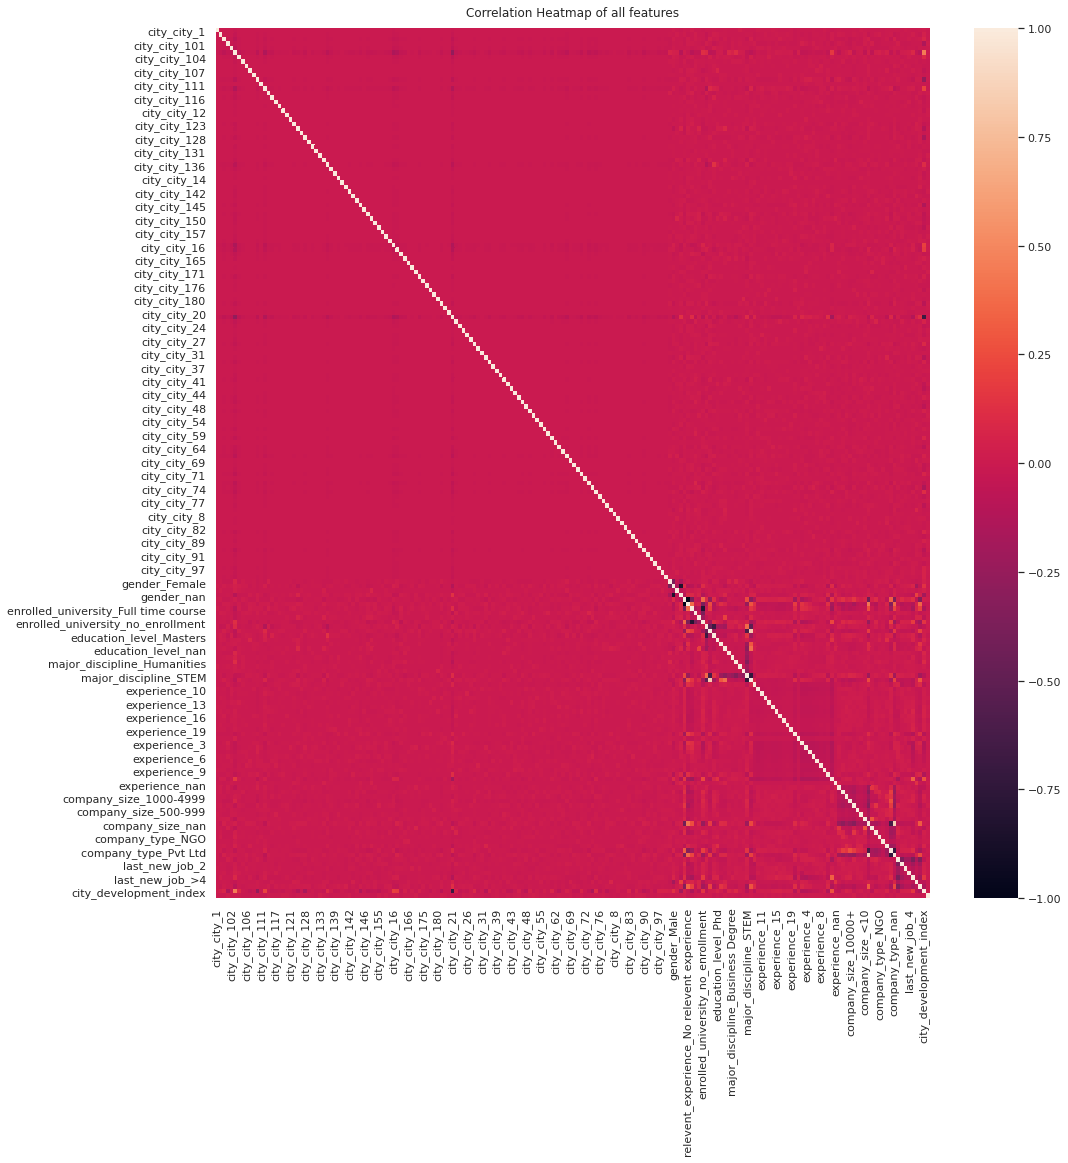

In [ ]:
# Upsampled

# Increase the size of the heatmap.
plt.figure(figsize=(16, 16))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X_train_enc_up_scaled.corr(), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap of all features', fontdict={'fontsize':12}, pad=12);

It seems that our features do not suffer from multicollinearity as the pairwise Pearson correlation values seem to be close to 0. To verify this observation, we can plot a histogram of these correlation values, as follows:

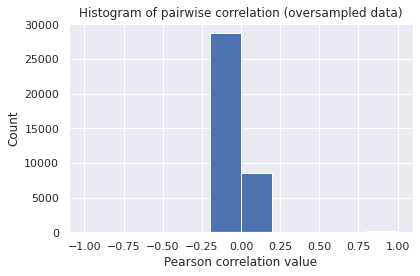

In [ ]:
fig, ax = plt.subplots()
plt.hist(X_train_enc_up_scaled.corr().values.flatten())
plt.xlabel('Pearson correlation value')
plt.ylabel('Count')
plt.title('Histogram of pairwise correlation (oversampled data)')
plt.tight_layout()

It is indeed true that the features are not pairwise correlated. We perform this collinearity check with the undersampled and synthetically sampled train data as well.

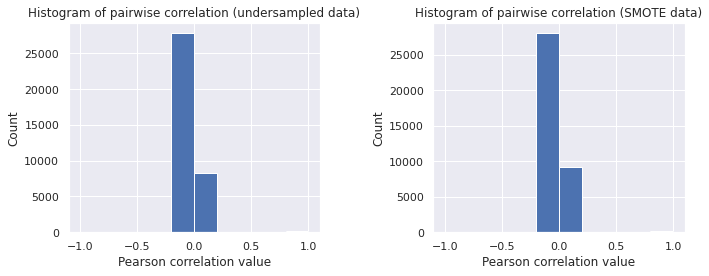

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
ax[0].hist(X_train_enc_down_scaled.corr().values.flatten())
ax[1].hist(X_train_enc_smote_scaled.corr().values.flatten())
ax[0].set_xlabel('Pearson correlation value')
ax[1].set_xlabel('Pearson correlation value')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[0].set_title('Histogram of pairwise correlation (undersampled data)')
ax[1].set_title('Histogram of pairwise correlation (SMOTE data)')
plt.tight_layout()

Nonetheless, it is good practice to reduce the dimensionality of our data, since our data has a lot of features (>190). Fewer input dimensions often mean correspondingly fewer parameters or a simpler structure in the machine learning model, referred to as degrees of freedom. A model with too many degrees of freedom is likely to overfit the training dataset and therefore may not perform well on new data. It is desirable to have simple models that generalize well, and in turn, input data with few input variables. [[1]](https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/)

> The fundamental reason for the curse of dimensionality is that high-dimensional functions have the potential to be much more complicated than low-dimensional ones, and that those complications are harder to discern. The only way to beat the curse is to incorporate knowledge about the data that is correct. [[2]](https://www.amazon.com/Pattern-Classification-Pt-1-Richard-Duda/dp/0471056693)

We use [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) as our dimensionality reduction method. In essence, PCA is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

One parameter of PCA that we can tweak is the number of principal components (`n_components`). In this notebook, we decide on the value `n_components` by specifying a threshold of the amount of variance of our original data that can be explained by the principal components. We set this threshold as 80%, i.e., the principal components should explain 80% of our data. From this threshold, we determine the value of `n_components`, by plotting the cumulative sum of their explained variances.



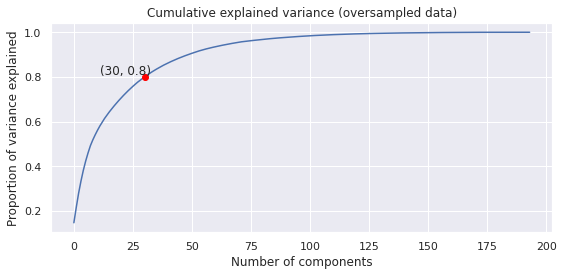

In [ ]:
from sklearn.decomposition import PCA

#### Oversampled ###
pca = PCA(n_components = len(X_train_enc_up_scaled.columns))
pca.fit(X_train_enc_up_scaled.values)

# Plot cumulative sum of explained variances
vars = pca.explained_variance_ratio_
vars_cumsum = np.cumsum(vars)

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(vars_cumsum)
threshold = [(i,round(s,3)) for i,s in enumerate(vars_cumsum) if s >= 0.8][0]
ax.plot([threshold[0]],[threshold[1]], 'o', color = 'red')
ax.annotate('{}'.format(threshold), (threshold[0], threshold[1]),
            xytext=(0.2, 0.8), textcoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='top')
ax.set_title('Cumulative explained variance (oversampled data)')
ax.set_xlabel('Number of components')
ax.set_ylabel('Proportion of variance explained')
plt.tight_layout()

The plot above shows that, to explain 80% of the variance in our data, we need to keep the first 31 principal components. That is a drastic reduction from > 190 features that we have originally.

Therefore, we will specify `n_components = 31` for the oversampled data.

In [ ]:
pca_up = PCA(n_components = 31)
pca_up.fit(X_train_enc_up_scaled.values)
PCA_X_train_enc_up_scaled = pca_up.transform(X_train_enc_up_scaled.values)
PCA_X_train_enc_up_scaled.shape

(28762, 31)

We perform the same PCA operation to the undersampled and SMOTE datasets.

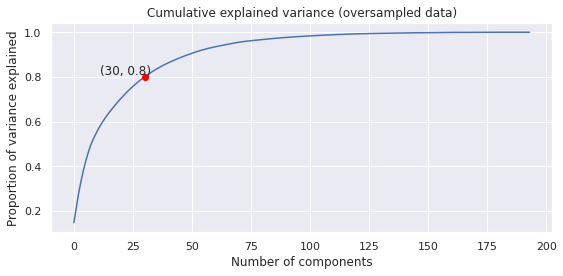

In [ ]:
#### Undersampled ###
pca = PCA(n_components = len(X_train_enc_down_scaled.columns))
pca.fit(X_train_enc_down_scaled.values)

# Plot cumulative sum of explained variances
vars = pca.explained_variance_ratio_
vars_cumsum = np.cumsum(vars)

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(vars_cumsum)
threshold = [(i,round(s,3)) for i,s in enumerate(vars_cumsum) if s >= 0.8][0]
ax.plot([threshold[0]],[threshold[1]], 'o', color = 'red')
ax.annotate('{}'.format(threshold), (threshold[0], threshold[1]),
            xytext=(0.2, 0.8), textcoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='top')
ax.set_title('Cumulative explained variance (oversampled data)')
ax.set_xlabel('Number of components')
ax.set_ylabel('Proportion of variance explained')
plt.tight_layout()

In [ ]:
pca_down = PCA(n_components = 31)
pca_down.fit(X_train_enc_down_scaled.values)
PCA_X_train_enc_down_scaled = pca_down.transform(X_train_enc_down_scaled.values)
PCA_X_train_enc_down_scaled.shape

(9554, 31)

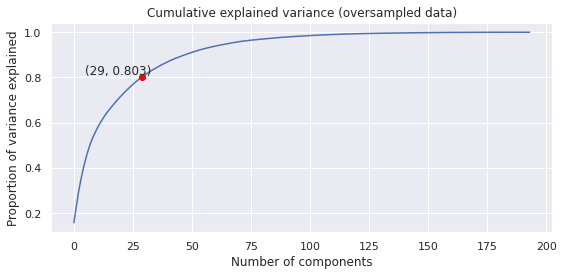

In [ ]:
#### SMOTE ###
pca = PCA(n_components = len(X_train_enc_smote_scaled.columns))
pca.fit(X_train_enc_smote_scaled.values)

# Plot cumulative sum of explained variances
vars = pca.explained_variance_ratio_
vars_cumsum = np.cumsum(vars)

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(vars_cumsum)
threshold = [(i,round(s,3)) for i,s in enumerate(vars_cumsum) if s >= 0.8][0]
ax.plot([threshold[0]],[threshold[1]], 'o', color = 'red')
ax.annotate('{}'.format(threshold), (threshold[0], threshold[1]),
            xytext=(0.2, 0.8), textcoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='top')
ax.set_title('Cumulative explained variance (oversampled data)')
ax.set_xlabel('Number of components')
ax.set_ylabel('Proportion of variance explained')
plt.tight_layout()

In [ ]:
pca_smote = PCA(n_components = 30)
pca_smote.fit(X_train_enc_smote_scaled.values)
PCA_X_train_enc_smote_scaled = pca_smote.transform(X_train_enc_smote_scaled.values)
PCA_X_train_enc_smote_scaled.shape

(28762, 30)

Last but not least, we preprocess the features in the test set similarly (without the resampling procedure), so that we can evaluate our model on the test set.

In [ ]:
# encoder2 = OneHotEncoder(handle_unknown='ignore')
X_test = test.drop(['enrollee_id'], axis = 1)
X_test_categorical = X_test.drop(['city_development_index','training_hours'],axis=1)

# Convert nan to strings
X_test_categorical = X_test_categorical.fillna('nan')

# One-hot encode
X_test_enc_array = encoder.transform(X_test_categorical).toarray()
# # Get column names
# colnames = encoder.get_feature_names(X_train_categorical.columns)
# Recreate X_train dataframe
X_test_enc = pd.DataFrame(
    X_test_enc_array, columns = colnames
)
X_test_enc['city_development_index'] = X_test['city_development_index']

In [ ]:
# Scale training_hours
# scaler2 = MinMaxScaler()
scaled_hours_up = scaler_up.transform(np.array(X_test['training_hours']).reshape(-1, 1))
scaled_hours_down = scaler_down.transform(np.array(X_test['training_hours']).reshape(-1, 1))
scaled_hours_smote = scaler_smote.transform(np.array(X_test['training_hours']).reshape(-1, 1))
X_test_enc_up = X_test_enc.copy()
X_test_enc_down = X_test_enc.copy()
X_test_enc_smote = X_test_enc.copy()
X_test_enc_up['scaled_train_hours'] = list(scaled_hours_up.flat)
X_test_enc_down['scaled_train_hours'] = list(scaled_hours_down.flat)
X_test_enc_smote['scaled_train_hours'] = list(scaled_hours_smote.flat)

print('Shape of test data:', X_test_enc_up.shape)
X_test_enc_up.head()

Shape of test data: (2129, 194)


,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,...,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_nan,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_nan,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_nan,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_nan,last_new_job_never,city_development_index,scaled_train_hours
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.827,0.059701
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.920,0.289552
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.624,0.041791
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.827,0.113433
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.920,0.211940


In [ ]:
PCA_X_test_enc_up = pca_up.transform(X_test_enc_up.values)
PCA_X_test_enc_down = pca_down.transform(X_test_enc_down.values)
PCA_X_test_enc_smote = pca_smote.transform(X_test_enc_smote.values)

### 4. Model

For this section of the notebook, we implement 3 models:

1.   Linear model: Logistic Regression
2.   Nonlinear model: Random Forest Classifier
3.   Deep Learning model: Deep Multilayer Perceptron (to be added!)

For imbalanced datasets, accuracy is not a reliable evaluation metric. Therefore, instead, we will use F1 and Recall as the scoring metrics for our models.

#### 4.1 Logistic Regression
##### 4.1.1 Oversampled data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

lr_up = LogisticRegression(solver = 'liblinear', random_state = 27)
lr_up.fit(PCA_X_train_enc_up_scaled, y_train_up)
y_test_pred_up = lr_up.predict(PCA_X_test_enc_up)
y_train_pred_up = lr_up.predict(PCA_X_train_enc_up_scaled)

# Evaluate scoring metrics on train test
f1_train_up = f1_score(y_train_up, y_train_pred_up)
accuracy_train_up = accuracy_score(y_train_up, y_train_pred_up)
recall_train_up = recall_score(y_train_up, y_train_pred_up)
confusion_matrix_train_up = pd.DataFrame(confusion_matrix(y_train_up, y_train_pred_up))

# Print results
print('F1 score (oversampled data):', f1_train_up)
print('Accuracy score (oversampled data):', accuracy_train_up)
print('Recall score (oversampled data):', recall_train_up)
print('Confusion matrix (oversampled data):')
print(confusion_matrix_train_up)

F1 score (oversampled data): 0.7265092240327327
Accuracy score (oversampled data): 0.7350671024268132
Recall score (oversampled data): 0.7037758153118698
Confusion matrix (oversampled data):
       0      1
0  11021   3360
1   4260  10121


##### 4.1.2 Undersampled data

In [ ]:
lr_down = LogisticRegression(solver = 'liblinear', random_state = 27)
lr_down.fit(PCA_X_train_enc_down_scaled, y_train_down)
y_test_pred_down = lr_down.predict(PCA_X_test_enc_down)
y_train_pred_down = lr_down.predict(PCA_X_train_enc_down_scaled)

# Evaluate scoring metrics on train test
f1_train_down = f1_score(y_train_down, y_train_pred_down)
accuracy_train_down = accuracy_score(y_train_down, y_train_pred_down)
recall_train_down = recall_score(y_train_down, y_train_pred_down)
confusion_matrix_train_down = pd.DataFrame(confusion_matrix(y_train_down, y_train_pred_down))

# Print results
print('F1 score (undersampled data):', f1_train_down)
print('Accuracy score (undersampled data):', accuracy_train_down)
print('Recall score (undersampled data):', recall_train_down)
print('Confusion matrix (undersampled data):')
print(confusion_matrix_train_down)

F1 score (undersampled data): 0.7342755421296797
Accuracy score (undersampled data): 0.7422022189658781
Recall score (undersampled data): 0.7123717814527947
Confusion matrix (undersampled data):
      0     1
0  3688  1089
1  1374  3403


##### 4.1.3 SMOTE data

In [ ]:
lr_smote = LogisticRegression(solver = 'liblinear', random_state = 27)
lr_smote.fit(PCA_X_train_enc_smote_scaled, y_train_smote)
y_test_pred_smote = lr_smote.predict(PCA_X_test_enc_smote)
y_train_pred_smote = lr_smote.predict(PCA_X_train_enc_smote_scaled)

# Evaluate scoring metrics on train test
f1_train_smote = f1_score(y_train_smote, y_train_pred_smote)
accuracy_train_smote = accuracy_score(y_train_smote, y_train_pred_smote)
recall_train_smote = recall_score(y_train_smote, y_train_pred_smote)
confusion_matrix_train_smote = pd.DataFrame(confusion_matrix(y_train_smote, y_train_pred_smote))

# Print results
print('F1 score (SMOTE data):', f1_train_smote)
print('Accuracy score (SMOTE data):', accuracy_train_smote)
print('Recall score (SMOTE data):', recall_train_smote)
print('Confusion matrix (SMOTE data):')
print(confusion_matrix_train_smote)

F1 score (SMOTE data): 0.7623324728597194
Accuracy score (SMOTE data): 0.7663236214449621
Recall score (SMOTE data): 0.7495306306932759
Confusion matrix (SMOTE data):
       0      1
0  11262   3119
1   3602  10779


##### 4.1.4 Remarks

Synthetically sampling the data results in the best performing Logistic Regression model, as seen from the highest F1 and Recall scores above. The accuracy score is observed to be highest as well, although it is not our desired scoring metric as mentioned above.

#### 4.2 Random Forest Regression
##### 4.2.1 Oversampled data

F1 score (oversampled data): 0.9991314317479068
Accuracy score (oversampled data): 0.9991307975801405
Recall score (oversampled data): 0.9998609276128225
Confusion matrix (oversampled data):
       0      1
0  14358     23
1      2  14379


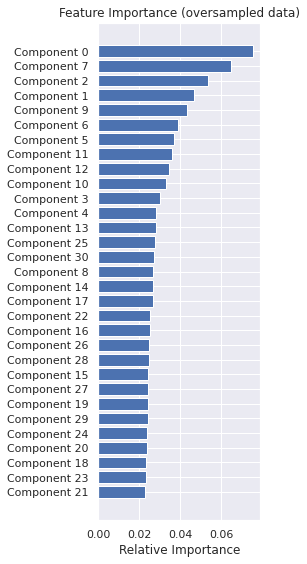

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_up = RandomForestClassifier(n_estimators=500, max_features = 6, random_state=27)
clf_up.fit(PCA_X_train_enc_up_scaled, y_train_up)

y_test_pred_up = clf_up.predict(PCA_X_test_enc_up)
y_train_pred_up = clf_up.predict(PCA_X_train_enc_up_scaled)

# Evaluate scoring metrics on train test
f1_train_up = f1_score(y_train_up, y_train_pred_up)
accuracy_train_up = accuracy_score(y_train_up, y_train_pred_up)
recall_train_up = recall_score(y_train_up, y_train_pred_up)
confusion_matrix_train_up = pd.DataFrame(confusion_matrix(y_train_up, y_train_pred_up))

# Print results
print('F1 score (oversampled data):', f1_train_up)
print('Accuracy score (oversampled data):', accuracy_train_up)
print('Recall score (oversampled data):', recall_train_up)
print('Confusion matrix (oversampled data):')
print(confusion_matrix_train_up)

# Plot feature importance plot
features = ['Component {}'.format(i) for i in range(len(PCA_X_train_enc_up_scaled))]
importances = clf_up.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (4,8))
plt.title('Feature Importance (oversampled data)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()

##### 4.2. Undersampled data

F1 score (undersampled data): 0.9989539748953975
Accuracy score (undersampled data): 0.998953317981997
Recall score (undersampled data): 0.9995813271927988
Confusion matrix (undersampled data):
      0     1
0  4769     8
1     2  4775


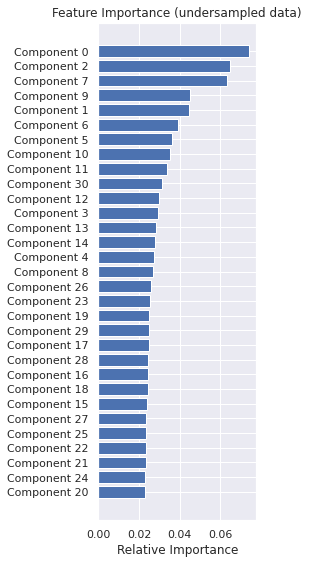

In [ ]:
clf_down = RandomForestClassifier(n_estimators=500, max_features = 6, random_state=27)
clf_down.fit(PCA_X_train_enc_down_scaled, y_train_down)

y_test_pred_down = clf_down.predict(PCA_X_test_enc_down)
y_train_pred_down = clf_down.predict(PCA_X_train_enc_down_scaled)

# Evaluate scoring metrics on train test
f1_train_down = f1_score(y_train_down, y_train_pred_down)
accuracy_train_down = accuracy_score(y_train_down, y_train_pred_down)
recall_train_down = recall_score(y_train_down, y_train_pred_down)
confusion_matrix_train_down = pd.DataFrame(confusion_matrix(y_train_down, y_train_pred_down))

# Print results
print('F1 score (undersampled data):', f1_train_down)
print('Accuracy score (undersampled data):', accuracy_train_down)
print('Recall score (undersampled data):', recall_train_down)
print('Confusion matrix (undersampled data):')
print(confusion_matrix_train_down)

# Plot feature importance plot
features = ['Component {}'.format(i) for i in range(len(PCA_X_train_enc_down_scaled))]
importances = clf_down.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (4,8))
plt.title('Feature Importance (undersampled data)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()

##### 4.2.3 SMOTE data

F1 score (SMOTE data): 0.9991305255103815
Accuracy score (SMOTE data): 0.9991307975801405
Recall score (SMOTE data): 0.998817884708991
Confusion matrix (SMOTE data):
       0      1
0  14373      8
1     17  14364


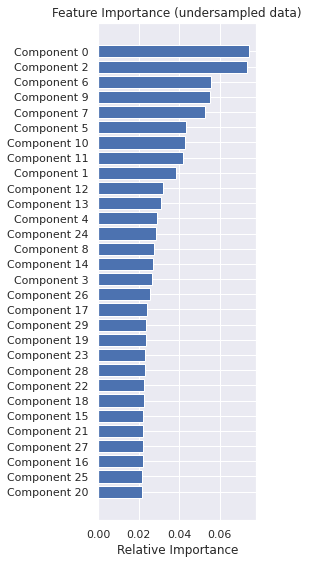

In [ ]:
clf_smote = RandomForestClassifier(n_estimators=500, max_features = 6, random_state=27)
clf_smote.fit(PCA_X_train_enc_smote_scaled, y_train_smote)

y_test_pred_smote = clf_smote.predict(PCA_X_test_enc_smote)
y_train_pred_smote = clf_smote.predict(PCA_X_train_enc_smote_scaled)

# Evaluate scoring metrics on train test
f1_train_smote = f1_score(y_train_smote, y_train_pred_smote)
accuracy_train_smote = accuracy_score(y_train_smote, y_train_pred_smote)
recall_train_smote = recall_score(y_train_smote, y_train_pred_smote)
confusion_matrix_train_smote = pd.DataFrame(confusion_matrix(y_train_smote, y_train_pred_smote))

# Print results
print('F1 score (SMOTE data):', f1_train_smote)
print('Accuracy score (SMOTE data):', accuracy_train_smote)
print('Recall score (SMOTE data):', recall_train_smote)
print('Confusion matrix (SMOTE data):')
print(confusion_matrix_train_smote)

# Plot feature importance plot
features = ['Component {}'.format(i) for i in range(len(PCA_X_train_enc_smote_scaled))]
importances = clf_smote.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (4,8))
plt.title('Feature Importance (undersampled data)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()

In [ ]:
import pickle
pickle.dump(lr_smote, open('smote_lr.pkl','wb'))

##### 4.2.4 Remarks

The nonlinear Random Forest classifiers perform significantly better than the linear Logistic Regression classifiers. The F1 and recall scores across the 3 resampled datasets are, in general, consistenly higher and > 0.9. However, this may be a sign of overfitting.

To tackle overfitting, we need to perform cross validation to for model selection. In the next section, we will use `GridSearchCV` to perform hyperparameter search for model selection, together with 10-fold cross validation.

### 4. Model Selection: Hyperparameter Search and Cross Validation

In this section, we will use `GridSearchCV` from the `scikit-learn` package to perform hyperparameter search for model selection, together with 10-fold cross validation.

We will perform hyperparameter tuning on the SMOTE data, using the Random Forest classifier.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=27)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=500, random_state=27, n_jobs = -1)
# Fit the random search model
rf_random.fit(PCA_X_train_enc_smote_scaled, y_train_smote)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 34

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

The most important arguments in RandomizedSearchCV are `n_iter`, which controls the number of different combinations to try, and `cv` which is the number of folds to use for cross validation (we use 100 and 10 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental considerations.

We can view the best parameters from fitting the random search:

In [ ]:
print(rf_random.best_params_)

{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


To save the configuration of the random search:
```
RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs...
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   pre_dispatch='2*n_jobs', random_state=27, refit=True,
                   return_train_score=False, scoring=None, verbose=500)
```

The best parameters are:
```
{
  'n_estimators': 1600,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': 20,
  'bootstrap': False
}
```

We fit the Random Forest classifier to our SMOTE data using these parameters:

F1 score (best model): 0.9821893410056173
Accuracy score (best model): 0.9819205896669216
Recall score (best model): 0.9970099436756832
Confusion matrix (best model):
       0      1
0  13904    477
1     43  14338


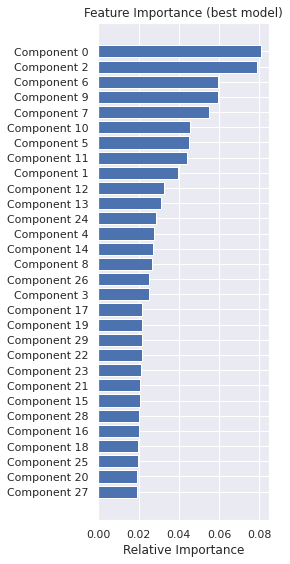

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(rf_random.best_estimator_, 'best_random_forest_classifier_for_SMOTE.pkl')

best_clf = RandomForestClassifier(
    n_estimators=1600,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=20,
    bootstrap=False,
    random_state=27
    )
best_clf.fit(PCA_X_train_enc_smote_scaled, y_train_smote)

y_test_pred = best_clf.predict(PCA_X_test_enc_smote)
y_train_pred = best_clf.predict(PCA_X_train_enc_smote_scaled)

# Evaluate scoring metrics on train test
f1_train = f1_score(y_train_smote, y_train_pred)
accuracy_train = accuracy_score(y_train_smote, y_train_pred)
recall_train = recall_score(y_train_smote, y_train_pred)
confusion_matrix_train = pd.DataFrame(confusion_matrix(y_train_smote, y_train_pred))

# Print results
print('F1 score (best model):', f1_train)
print('Accuracy score (best model):', accuracy_train)
print('Recall score (best model):', recall_train)
print('Confusion matrix (best model):')
print(confusion_matrix_train)

# Plot feature importance plot
features = ['Component {}'.format(i) for i in range(len(PCA_X_train_enc_smote_scaled))]
importances = best_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (4,8))
plt.title('Feature Importance (best model)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()

It's interesting to note that the confusion matrix for this model shows a higher proportion of false positives and false negatives than the baseline model on the SMOTE data. Nonetheless, this model has undergone cross validation to mitigate overfitting, and should be favored over the baseline model.

In [ ]:
# Save the model
import pickle
filename = 'best_model.sav'
pickle.dump(best_clf, open(filename, 'wb'))

# Load model
best_clf = pickle.load(open(filename, 'rb'))

SInce the pickled model is large, we may attempt to compress the pickle using `bz2` and `_pickle`, as follows:

In [ ]:
import bz2
import _pickle as cPickle
with bz2.BZ2File('best_model_compressed' + '.pbz2', 'w') as f: 
  cPickle.dump(best_clf, f)

In [ ]:
best_model = bz2.BZ2File('best_model_compressed.pbz2', 'rb')
best_model = cPickle.load(best_model)
best_model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=27, verbose=0,
                       warm_start=False)

## Streamlit

Now that we have a model up and running, we can use it to create an interactive web app using Streamlit.

In [ ]:
!pip install streamlit
!pip install Pillow

import streamlit as st
import pickle
from PIL import Image

     |████████████████████████████████| 7.4MB 5.4MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 163kB 46.3MB/s 
     |████████████████████████████████| 112kB 48.1MB/s 
     |████████████████████████████████| 4.5MB 46.2MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 122kB 49.6MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=e84287bb3dd81c8593898ba700e3c930f2f57e6fca2804e8a13f3a5ec398bca0
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.4.2 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


ContextualVersionConflict: ignored

In [ ]:
# Load model
best_clf = pickle.load(open(filename, 'rb'))

In [ ]:
# Configure web app parameters
st.header("Employee Trajectory: Switch job vs Stay at a company")
image = Image.open(r'/content/employees.jpg')
st.image(image, use_column_width = True, format = 'JPG')
st.write("Please insert values to determine whether an employee will stay at a company or switch jobs.")

Coming to the important part, it's time to take feature values as input from our Users, and based on those inputs, our Random Forest classifier will predict the employee's decision to stay or switch job. Streamlit provides us wonderful options to accept the inputs in form of text-boxes, Slider options, etc.

Here, we will go with

*   numerical input options for numerical features, and
*   select boxes for categorical features.



In [ ]:
import re

# City
unique_cities = sorted([x for x in list(set(train['city'].unique().tolist() + test['city'].unique().tolist())) if str(x)!='nan'])
unique_cities = sorted([int(re.search('\d+',x).group()) for x in unique_cities])
unique_cities = ['city_{}'.format(i) for i in unique_cities]

def format_city(city):
  return int(re.search('\d+',city).group())

city = st.selectbox(
    label = 'Select the city of the employee.',
    options = unique_cities,
    format_func = format_city
)

In [ ]:
# Gender
unique_genders = sorted([x for x in list(set(train['gender'].unique().tolist() + test['gender'].unique().tolist())) if str(x)!='nan'])
gender = st.selectbox(
    label = 'Select the gender of the employee.',
    options = unique_genders
)

In [ ]:
# Relevent experience
unique_relevent_experiences = sorted([x for x in list(set(train['relevent_experience'].unique().tolist() \
                                                          + test['relevent_experience'].unique().tolist())) if str(x)!='nan'])
print(unique_relevent_experiences)
relevent_experience = st.selectbox(
    label = 'Select whether the employee has relevant experience.',
    options = unique_relevent_experiences
)

In [ ]:
# Enrolled university
unique_enrolled_universities = sorted([x for x in list(set(train['enrolled_university'].unique().tolist() \
                                                          + test['enrolled_university'].unique().tolist())) if str(x)!='nan'])
def format_cap(text):
  return text.replace('_','').strip().capitalize()
print(unique_enrolled_universities)
enrolled_university = st.selectbox(
    label = 'Select whether the employee enrolled in a university.',
    options = unique_enrolled_universities,
    format_func = format_cap
)

In [ ]:
# Education level
unique_education_levels = sorted([x for x in list(set(train['education_level'].unique().tolist() \
                                                          + test['education_level'].unique().tolist())) if str(x)!='nan'])

print(unique_education_levels)
education_level = st.selectbox(
    label = 'Select the education level of the employee.',
    options = unique_education_levels
)

In [ ]:
# Major discipline
unique_major_disciplines = sorted([x for x in list(set(train['major_discipline'].unique().tolist() \
                                                          + test['major_discipline'].unique().tolist())) if str(x)!='nan'])

print(unique_major_disciplines)
major_discipline = st.selectbox(
    label = 'Select the major discipline of the employee.',
    options = unique_major_disciplines
)

In [ ]:
# Experience
unique_experiences = sorted([x for x in list(set(train['experience'].unique().tolist() \
                                                          + test['experience'].unique().tolist())) if str(x)!='nan'])

print(unique_experiences)
experience = st.number_input(
    label = "Enter the employee's number of years of experience.",
    min_value = 0.,
    max_value = 80.,
    step = 0.1
)

In [ ]:
# Company size
unique_company_sizes = sorted([x for x in list(set(train['company_size'].unique().tolist() \
                                                          + test['company_size'].unique().tolist())) if str(x)!='nan'])

print(unique_company_sizes)
company_size = st.number_input(
    label = "Enter the employer's current company size.",
    min_value = 1.
)

In [ ]:
# Company type
unique_company_types = sorted([x for x in list(set(train['company_type'].unique().tolist() \
                                                          + test['company_type'].unique().tolist())) if str(x)!='nan'])

print(unique_company_types)
company_type = st.selectbox(
    label = "Select the employer's company type.",
    options = unique_company_types
)

In [ ]:
# Last new job
unique_lastNewJobs = sorted([x for x in list(set(train['last_new_job'].unique().tolist() \
                                                          + test['last_new_job'].unique().tolist())) if str(x)!='nan'])

print(unique_lastNewJobs)
last_new_job = st.selectbox(
    label = "Select the difference in years between the employee's previous job and their current job.",
    options = unique_lastNewJobs
)

In [ ]:
# Training hours
unique_training_hours = sorted([x for x in list(set(train['training_hours'].unique().tolist() \
                                                          + test['training_hours'].unique().tolist())) if str(x)!='nan'])

training_hours = st.number_input(
    label = "Enter the employee's training hours.",
    min_value = 0.,
    step = 1.
)

In [ ]:
# City development index
unique_city_development_indices = sorted([x for x in list(set(train['city_development_index'].unique().tolist() \
                                                          + test['city_development_index'].unique().tolist())) if str(x)!='nan'])
print(min(unique_city_development_indices),max(unique_city_development_indices))
city_development_index = st.number_input(
    label = "Enter the city development index.",
    min_value = 0.,
    max_value = 1.,
    step = 0.001
)

In [ ]:
data = {'city':city,
        'city_development_index':city_development_index,
        'gender':gender,
       'relevent_experience':relevent_experience,
        'enrolled_university':enrolled_university,
        'education_level':education_level,
       'major_discipline':major_discipline,
        'experience':experience,
        'company_size':company_size,
        'company_type':company_type,
       'last_new_job':last_new_job,
        'training_hours':training_hours}

In [ ]:
st_features = pd.DataFrame(data, index=[0])
# Format some columns
def experience_st_func(num):
  if num < 1:
    return '<1'
  elif num > 20:
    return '>20'
  else:
    return (str(num))
def company_size_st_func(num):
  if num < 10:
    return '<10'
  elif num >=10 and num <= 49:
    return '10/49'
  elif num >=50 and num <= 99:
    return '50-99'
  elif num >=100 and num <= 499:
    return '100-500'
  elif num >=500 and num <= 999:
    return '500-999'
  elif num >=1000 and num <= 4999:
    return '1000-4999'
  elif num >=5000 and num <= 9999:
    return '5000-9999'
  else:
    return '10000+'

# Construct dataframe of features
st_features['experience'] = st_features['experience'].apply(lambda x: experience_st_func(x))
st_features['company_size'] = st_features['company_size'].apply(lambda x: company_size_st_func(x))

st_features

In [ ]:
# Run preprocessing pipeline on this one sample of features
st_features_categorical = st_features.drop(['city_development_index','training_hours'],axis=1)

# One-hot encode
st_features_enc_array = encoder.transform(st_features_categorical).toarray()
# Recreate X_train dataframe
st_features_enc = pd.DataFrame(
    st_features_enc_array, columns = colnames
)
st_features_enc['city_development_index'] = st_features['city_development_index']

# Scale training_hours
st_features_scaled_hours_smote = scaler_smote.transform(np.array(st_features['training_hours']).reshape(-1, 1))
st_features_enc_smote = st_features_enc.copy()
st_features_enc_smote['scaled_train_hours'] = list(st_features_scaled_hours_smote.flat)

# PCA
PCA_st_features_enc_smote = pca_smote.transform(st_features_enc_smote.values)

# Predict
st_pred = best_clf.predict(PCA_st_features_enc_smote)

In [ ]:
# Convert to text string
st_pred_str = ['**not** looking for a job change' if st_pred[0]==0 else 'Looking for a job change' for x in st_pred][0]
print(st_pred_str)

In [ ]:
# Display the result in Streamlit
st.subheader('Prediction:')
st.write('The employee is {}.'.format(st_pred_str))

Finally, we are done with coding the basic Streamlit web app. Now we can render the web app on the local server.



In [ ]:
# Install pyngrok
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

In [ ]:
pickle.dump(encoder, open('encoder.sav', 'wb'))
pickle.dump(encoder, open('encoder.pkl', 'wb'))
encoder = pickle.load(open('encoder.sav', 'rb'))

pickle.dump(scaler_smote, open('scaler_smote.sav', 'wb'))
pickle.dump(scaler_smote, open('scaler_smote.pkl', 'wb'))
scaler_smote = pickle.load(open('scaler_smote.sav', 'rb'))

pickle.dump(pca_smote, open('pca_smote.sav', 'wb'))
pickle.dump(pca_smote, open('pca_smote.pkl', 'wb'))
pca_smote = pickle.load(open('pca_smote.sav', 'rb'))

In [ ]:
pickle.dump(scaler_smote, open('scaler_smote.sav', 'wb'))
pickle.dump(scaler_smote, open('scaler_smote.pkl', 'wb'))

We need to write our code for the web app to a Python file (`.py`), so we will do that in the cell below. Note that we need to prefix our code with the following command, in order to save our code to a `.py` file:
```
%%writefile <filename>.py
```

In [ ]:
%%writefile app2.py
import streamlit as st
import pickle
import re
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

##### Load model
filename = 'best_model.sav'
best_clf = pickle.load(open(filename, 'rb'))
encoder = pickle.load(open('encoder.sav', 'rb'))
scaler_smote = pickle.load(open('scaler_smote.sav', 'rb'))
pca_smote = pickle.load(open('pca_smote.sav', 'rb'))
colnames = ['city_city_1', 'city_city_10', 'city_city_100', 'city_city_101',
       'city_city_102', 'city_city_103', 'city_city_104', 'city_city_105',
       'city_city_106', 'city_city_107', 'city_city_109', 'city_city_11',
       'city_city_111', 'city_city_114', 'city_city_115', 'city_city_116',
       'city_city_117', 'city_city_118', 'city_city_12', 'city_city_120',
       'city_city_121', 'city_city_123', 'city_city_126', 'city_city_127',
       'city_city_128', 'city_city_129', 'city_city_13', 'city_city_131',
       'city_city_133', 'city_city_134', 'city_city_136', 'city_city_138',
       'city_city_139', 'city_city_14', 'city_city_140', 'city_city_141',
       'city_city_142', 'city_city_143', 'city_city_144', 'city_city_145',
       'city_city_146', 'city_city_149', 'city_city_150', 'city_city_152',
       'city_city_155', 'city_city_157', 'city_city_158', 'city_city_159',
       'city_city_16', 'city_city_160', 'city_city_162', 'city_city_165',
       'city_city_166', 'city_city_167', 'city_city_171', 'city_city_173',
       'city_city_175', 'city_city_176', 'city_city_179', 'city_city_18',
       'city_city_180', 'city_city_19', 'city_city_2', 'city_city_20',
       'city_city_21', 'city_city_23', 'city_city_24', 'city_city_25',
       'city_city_26', 'city_city_27', 'city_city_28', 'city_city_30',
       'city_city_31', 'city_city_33', 'city_city_36', 'city_city_37',
       'city_city_39', 'city_city_40', 'city_city_41', 'city_city_42',
       'city_city_43', 'city_city_44', 'city_city_45', 'city_city_46',
       'city_city_48', 'city_city_50', 'city_city_53', 'city_city_54',
       'city_city_55', 'city_city_57', 'city_city_59', 'city_city_61',
       'city_city_62', 'city_city_64', 'city_city_65', 'city_city_67',
       'city_city_69', 'city_city_7', 'city_city_70', 'city_city_71',
       'city_city_72', 'city_city_73', 'city_city_74', 'city_city_75',
       'city_city_76', 'city_city_77', 'city_city_78', 'city_city_79',
       'city_city_8', 'city_city_80', 'city_city_81', 'city_city_82',
       'city_city_83', 'city_city_84', 'city_city_89', 'city_city_9',
       'city_city_90', 'city_city_91', 'city_city_93', 'city_city_94',
       'city_city_97', 'city_city_98', 'city_city_99', 'gender_Female',
       'gender_Male', 'gender_Other', 'gender_nan',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course', 'enrolled_university_nan',
       'enrolled_university_no_enrollment', 'education_level_Graduate',
       'education_level_High School', 'education_level_Masters',
       'education_level_Phd', 'education_level_Primary School',
       'education_level_nan', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'major_discipline_nan', 'experience_1',
       'experience_10', 'experience_11', 'experience_12', 'experience_13',
       'experience_14', 'experience_15', 'experience_16', 'experience_17',
       'experience_18', 'experience_19', 'experience_2', 'experience_20',
       'experience_3', 'experience_4', 'experience_5', 'experience_6',
       'experience_7', 'experience_8', 'experience_9', 'experience_<1',
       'experience_>20', 'experience_nan', 'company_size_10/49',
       'company_size_100-500', 'company_size_1000-4999',
       'company_size_10000+', 'company_size_50-99',
       'company_size_500-999', 'company_size_5000-9999',
       'company_size_<10', 'company_size_nan',
       'company_type_Early Stage Startup', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'company_type_nan', 'last_new_job_1', 'last_new_job_2',
       'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_nan', 'last_new_job_never']

##### Configure web app
PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.set_page_config(**PAGE_CONFIG)
st.set_option('deprecation.showImageFormat', False)
st.header("Employee Trajectory: Switch job vs Stay at current company")
image = Image.open(r'/content/employees.jpg')
st.image(image, use_column_width = True, format = 'JPG')
st.sidebar.write("**Please insert values to determine whether an employee will stay at their current company or switch jobs.**")

##### Pull features
def format_cap(text):
  return text.replace('_',' ').strip().capitalize()
def format_city(city):
  return int(re.search('\d+',city).group())
def experience_st_func(num):
  if num < 1:
    return '<1'
  elif num > 20:
    return '>20'
  else:
    return (str(num))
def company_size_st_func(num):
  if num < 10:
    return '<10'
  elif num >=10 and num <= 49:
    return '10/49'
  elif num >=50 and num <= 99:
    return '50-99'
  elif num >=100 and num <= 499:
    return '100-500'
  elif num >=500 and num <= 999:
    return '500-999'
  elif num >=1000 and num <= 4999:
    return '1000-4999'
  elif num >=5000 and num <= 9999:
    return '5000-9999'
  else:
    return '10000+'
# City
# unique_cities = sorted([x for x in train['city'].unique().tolist() if str(x)!='nan'])
# unique_cities = sorted([int(re.search('\d+',x).group()) for x in unique_cities])
# unique_cities = ['city_{}'.format(i) for i in unique_cities]
unique_cities = ['city_1', 'city_2', 'city_7', 'city_8', 'city_9', 'city_10',
       'city_11', 'city_12', 'city_13', 'city_14', 'city_16', 'city_18',
       'city_19', 'city_20', 'city_21', 'city_23', 'city_24', 'city_25',
       'city_26', 'city_27', 'city_28', 'city_30', 'city_31', 'city_33',
       'city_36', 'city_37', 'city_39', 'city_40', 'city_41', 'city_42',
       'city_43', 'city_44', 'city_45', 'city_46', 'city_48', 'city_50',
       'city_53', 'city_54', 'city_55', 'city_57', 'city_59', 'city_61',
       'city_62', 'city_64', 'city_65', 'city_67', 'city_69', 'city_70',
       'city_71', 'city_72', 'city_73', 'city_74', 'city_75', 'city_76',
       'city_77', 'city_78', 'city_79', 'city_80', 'city_81', 'city_82',
       'city_83', 'city_84', 'city_89', 'city_90', 'city_91', 'city_93',
       'city_94', 'city_97', 'city_98', 'city_99', 'city_100', 'city_101',
       'city_102', 'city_103', 'city_104', 'city_105', 'city_106',
       'city_107', 'city_109', 'city_111', 'city_114', 'city_115',
       'city_116', 'city_117', 'city_118', 'city_120', 'city_121',
       'city_123', 'city_126', 'city_127', 'city_128', 'city_129',
       'city_131', 'city_133', 'city_134', 'city_136', 'city_138',
       'city_139', 'city_140', 'city_141', 'city_142', 'city_143',
       'city_144', 'city_145', 'city_146', 'city_149', 'city_150',
       'city_152', 'city_155', 'city_157', 'city_158', 'city_159',
       'city_160', 'city_162', 'city_165', 'city_166', 'city_167',
       'city_171', 'city_173', 'city_175', 'city_176', 'city_179',
       'city_180']
city = st.sidebar.selectbox(
    label = 'Select the city of the employee.',
    options = unique_cities,
    format_func = format_city
)
# Gender
# unique_genders = sorted([x for x in train['gender'].unique().tolist() if str(x)!='nan'])
unique_genders = ['Female', 'Male', 'Other']
gender = st.sidebar.selectbox(
    label = 'Select the gender of the employee.',
    options = unique_genders
)
# Relevent experience
# unique_relevent_experiences = sorted([x for x in train['relevent_experience'].unique().tolist() if str(x)!='nan'])
unique_relevent_experiences = ['Has relevent experience', 'No relevent experience']
relevent_experience = st.sidebar.selectbox(
    label = 'Select whether the employee has relevant experience.',
    options = unique_relevent_experiences
)
# Enrolled university
# unique_enrolled_universities = sorted([x for x in train['enrolled_university'].unique().tolist() if str(x)!='nan'])
unique_enrolled_universities = ['Full time course', 'Part time course', 'no_enrollment']
enrolled_university = st.sidebar.selectbox(
    label = 'Select whether the employee enrolled in a university.',
    options = unique_enrolled_universities,
    format_func = format_cap
)
# Education level
# unique_education_levels = sorted([x for x in train['education_level'].unique().tolist() if str(x)!='nan'])
unique_education_levels = ['Graduate', 'High School', 'Masters', 'Phd', 'Primary School']
education_level = st.sidebar.selectbox(
    label = 'Select the education level of the employee.',
    options = unique_education_levels
)
# Major discipline
# unique_major_disciplines = sorted([x for x in train['major_discipline'].unique().tolist() if str(x)!='nan'])
unique_major_disciplines = ['Arts', 'Business Degree', 'Humanities', 'No Major', 'Other',
       'STEM']
major_discipline = st.sidebar.selectbox(
    label = 'Select the major discipline of the employee.',
    options = unique_major_disciplines
)
# Experience
experience = st.sidebar.number_input(
    label = "Enter the employee's number of years of experience.",
    min_value = 0.,
    max_value = 80.,
    step = 0.1
)
# Company size
company_size = st.sidebar.number_input(
    label = "Enter the employer's current company size.",
    min_value = 1.
)
# Company type
# unique_company_types = sorted([x for x in train['company_type'].unique().tolist() if str(x)!='nan'])
unique_company_types = ['Early Stage Startup', 'Funded Startup', 'NGO', 'Other',
       'Public Sector', 'Pvt Ltd']
company_type = st.sidebar.selectbox(
    label = "Select the employer's company type.",
    options = unique_company_types
)
# Last new job
# unique_lastNewJobs = sorted([x for x in train['last_new_job'].unique().tolist() if str(x)!='nan'])
unique_lastNewJobs = ['1', '2', '3', '4', '>4', 'never']
last_new_job = st.sidebar.selectbox(
    label = "Select the difference in years between the employee's previous job and their current job.",
    options = unique_lastNewJobs
)
# Training hours
training_hours = st.sidebar.number_input(
    label = "Enter the employee's training hours.",
    min_value = 0.,
    step = 1.
)
# City development index
city_development_index = st.sidebar.number_input(
    label = "Enter the city development index.",
    min_value = 0.,
    max_value = 1.,
    step = 0.001
)
data = {'city':city,
        'city_development_index':city_development_index,
        'gender':gender,
       'relevent_experience':relevent_experience,
        'enrolled_university':enrolled_university,
        'education_level':education_level,
       'major_discipline':major_discipline,
        'experience':experience,
        'company_size':company_size,
        'company_type':company_type,
       'last_new_job':last_new_job,
        'training_hours':training_hours}
# Create dataframe
st_features = pd.DataFrame(data, index=[0])
# Format some columns
st_features['experience'] = st_features['experience'].apply(lambda x: experience_st_func(x))
st_features['company_size'] = st_features['company_size'].apply(lambda x: company_size_st_func(x))

##### Run preprocessing pipeline on this one sample of features
st_features_categorical = st_features.drop(['city_development_index','training_hours'],axis=1)
# One-hot encode
st_features_enc_array = encoder.transform(st_features_categorical).toarray()
# Recreate X_train dataframe
st_features_enc = pd.DataFrame(
    st_features_enc_array, columns = colnames
)
st_features_enc['city_development_index'] = st_features['city_development_index']
# Scale training_hours
st_features_scaled_hours_smote = scaler_smote.transform(np.array(st_features['training_hours']).reshape(-1, 1))
st_features_enc_smote = st_features_enc.copy()
st_features_enc_smote['scaled_train_hours'] = list(st_features_scaled_hours_smote.flat)
# PCA
PCA_st_features_enc_smote = pca_smote.transform(st_features_enc_smote.values)
# Predict
st_pred = best_clf.predict(PCA_st_features_enc_smote)
# Convert to text string
st_pred_str = ['**not** looking for a job change' if st_pred[0]==0 else 'looking for a job change' for x in st_pred][0]

##### Display result
st.subheader('**Prediction:**')
st.write('The employee is {}.'.format(st_pred_str))

In [ ]:
# Check if the web app file is there
!ls

In [ ]:
# Shutting down app
!pgrep streamlit

In [ ]:
!kill 1916
!kill 1931

In [ ]:
ngrok.disconnect(public_url.public_url)

In [ ]:
ngrok.kill()

Set up an Ngrok tunnel that points to port 8501, the same port as our Streamlit web app is on.

In [ ]:
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(8501)
public_url

After configuring a tunnel using Ngrok, run the command below to start up the Streamlit web app, and then follow the URL above to view it. **DO NOT** use the links as shown under the Streamlit command below. Always use the Ngrok link.

In [ ]:
# Run the web app
!streamlit run app2.py

Our Streamlit app should look like below:

<img src="https://drive.google.com/uc?id=144U9UbfvB21TQutKxWGofjZT_phew38_"/>

For reference, we can try any of the feature combinations that our classifier predicts a `1` to test the web app, from the table below:

In [ ]:
# Test the wbe app with the following '1' predictions
temp = X_test.copy()
temp['prediction'] = y_test_pred
temp[temp.prediction==1].dropna(how='any',axis=0)

And that's it! We have successfully deployed our classification model on a public web app!

We can go one step further and share our web app with the Streamlit community. However, we would need a Streamlit Sharing account, which is still on an invitation basis. More information about Streamlit Sharing can be found [here](https://www.streamlit.io/sharing).

## Conclusion

In this notebook, we managed to complete the following tasks:

*   Exploratory Data Analysis
*   Preprocessing
*   Resampling to tackle data imbalance
*   Creating several Machine Learning models
*   Performing hyperparameter tuning through cross validation
*   Performing model selection through randomized search
*   Deploying a Machine Learning web app through Streamlit

## Contact

For questions or comments regarding this notebook, feel free to reach out to me at contact@anhtran.nl.

